In [1]:
#importing the required librariers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Read the data from the train Chennai sale csv file using pandas dataframe
data = pd.read_csv("train-chennai-sale.csv")

To take a closer look at the data, we take the help of “ .head()” function of pandas library which returns the first five observations of the data set. Similarly, “.tail()” returns last five observations of the data set.

In [3]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
data.columns#gives the columns present in the data

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

**Observations:**

1.  As REG_FEE and COMMIS columns does not much impact on the SALES_PRICE drop these two columns from it 
2.  Dropping PRT_ID column since it is a unique id given for each row does not impact much on the sales price

In [5]:
data.drop(["REG_FEE","COMMIS"],axis=1,inplace = True)
data.drop("PRT_ID",axis = 1,inplace=True)

In [6]:
#Find out the total number of rows and columns in the dataset using “.shape”.
data.shape

(7109, 19)

**Observations:**
* After removing few columns Dataset comprises 7109 observations(rows) and 19 features(columns).
* Out of the 19, one is the target variable and rest 18 are input variables.

In [7]:
#Checking for the duplicate values present in the dataset
print(data.duplicated().sum())

0


**Observations:**

As the sum is 0,there are no duplicate values present in the data set

In [8]:
#Checking for null values using isna() function and sum() gives total number of null values in each columns
data.isna().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

**Observations**

N_BEDROOM,N_BATHROOM,QS_OVERALL have some missing values need to be dropped or filled with the correspoding values

In [9]:
#info gives the Column, non null count and datatype of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

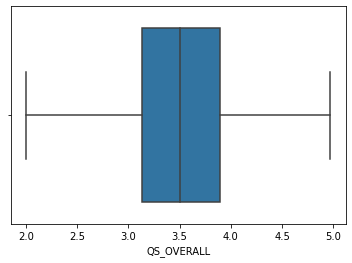

In [10]:
#checking for the QS_OVERALL column have any outliers in it
import seaborn as sns
sns.boxplot(x = 'QS_OVERALL', data = data)

There are no outliers present in the QS_OVERALL replace the null values with the mean of QS_OVERALL

In [11]:
#Checking for the number of unique values present in QS_OVERALL col
data["QS_OVERALL"].unique()

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 ,   nan, 3.57 , 4.3  ,
       3.35 , 4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 ,
       4.18 , 2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 ,
       3.12 , 3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 ,
       4.07 , 3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 ,
       3.985, 3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395,
       3.14 , 2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735,
       2.62 , 4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 ,
       2.9  , 3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 ,
       2.475, 2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 ,
       3.1  , 2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 ,
       3.56 , 4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 ,
       2.96 , 3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 ,
       3.86 , 3.62 ,

In [12]:
#Replacing the null values of QS_OVERALL with there respective mean values
QS_OVERALL_mean = data["QS_OVERALL"].mean()
data["QS_OVERALL"].fillna(QS_OVERALL_mean,inplace = True)

In [13]:
#Replacing the null values of N_BEDROOM,N_BATHROOM with there respective mode values
data["N_BEDROOM"].fillna(data['N_BEDROOM'].mode()[0],inplace = True)
data["N_BATHROOM"].fillna(data['N_BATHROOM'].mode()[0],inplace = True)

In [14]:
#Checking for the number of unique values present in N_BATHROOM col
print(data["N_BATHROOM"].unique())
#Checking for the number of unique values present in N_BEDROOM col
print(data["N_BEDROOM"].unique())


[1. 2.]
[1. 2. 3. 4.]


**Observation:**\
As N_BATHROOM,N_BEDROOM values have only integer values there are no floating value present convert it to the numeric column using astype method

In [15]:
#Conerting type from floating to integer type
data["N_BATHROOM"] = data["N_BATHROOM"].astype(int)
data["N_BEDROOM"] = data["N_BEDROOM"].astype(int)
#data.info()

In [16]:
#After replacing the null values with there respective mean rechecking any null values present in the data
data.isna().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

After replacing the null values the data doesnot have any null values

In [17]:
#Checking for the datatypes of each column
data.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [18]:
data["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

**Observations:**
AREA columns have lots of misspelled words i,e Karapakkam and Karapakam, KK Nagar and KKNagar,Chormpet,chormpt and chrmpet,Adyar and adyr,T Nagar and TNagar because of spelling mistakes they are considered as unique need to be replace these values with correct spelled Areas.

In [19]:
data["AREA"].replace({"Karapakam": "Karapakkam", "Ana Nagar": "Anna Nagar","Ann Nagar": "Anna Nagar","Adyr":"Adyar","KKNagar":"KK Nagar","TNagar":"T Nagar","Chrompt":"Chromepet","Chrompet":"Chromepet","Chrmpet":"Chromepet","Chormpet":"Chromepet","Velchery":"Velachery"}, inplace=True)

In [20]:
data["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chromepet',
       'KK Nagar', 'T Nagar'], dtype=object)

**Visualization of the DATASET**

For various data like AREA,BUILDTYPE,SALE_COND,N_ROOMS,N_BEDROOMS,MZZONE how the SALES_PRICE getting Impacting is visualized using barplot from the seaborn library

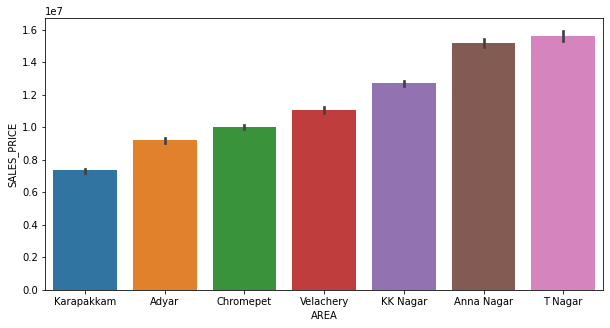

In [21]:
result = data.groupby(["AREA"])["SALES_PRICE"].aggregate(np.mean).reset_index().sort_values("SALES_PRICE")
plt.figure(figsize=(10,5))
sns.barplot(x=data.AREA,y=data.SALES_PRICE,data=data,order=result["AREA"])

**Observations:**
From the above plot "T Nagar" has highest "Sales_Price" and  "Karapakkam" has least "Sales_Price" compare to the other Areas.

There is a linear relationship between Area and Sales Price.

Label encoding can be done since there is a linearrelationship


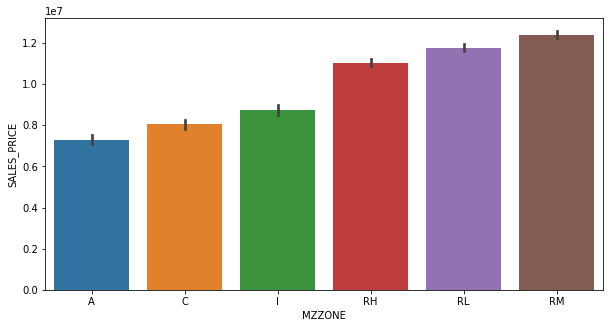

In [22]:
mzzone = data.groupby(["MZZONE"])["SALES_PRICE"].aggregate(np.mean).reset_index().sort_values("SALES_PRICE")
plt.figure(figsize=(10,5))
sns.barplot(x=data.MZZONE,y=data.SALES_PRICE,data=data,order=mzzone["MZZONE"])

**Observations:**
From the above plot MZZONE "RM" has highest "Sales_Price" and  MZZONE "A" has least "Sales_Price" compare to the other MZZONE.

There is a linear relationship between MZZONE and Sales Price.

Label encoding can be done since there is a linearrelationship

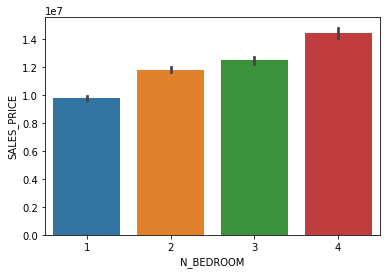

In [23]:
sns.barplot(x=data.N_BEDROOM,y=data.SALES_PRICE)

**Observations:**
From the above plot Sales_Price increases as the number of Bedrooms increases.There is a linear relationship between no of bedroom vs sales price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


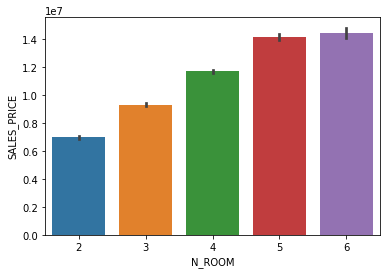

In [24]:
sns.barplot(data.N_ROOM,data.SALES_PRICE)

**Observations:**
From the above plot Sales_Price increases as the number of Rooms increases. House with 6 rooms as highest sales and House with 2 rooms has less sales price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


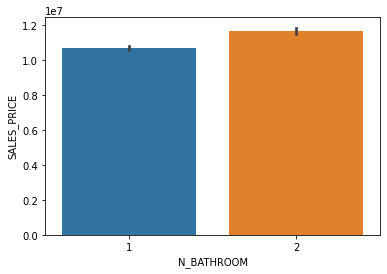

In [25]:
sns.barplot(data.N_BATHROOM,data.SALES_PRICE)

**Observations:**
From the above plot House with 2 Bathrooms have highest sales_price compared to house having 1 Bathroom.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


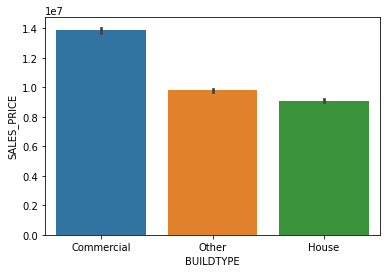

In [26]:
data["BUILDTYPE"].replace({"Comercial":"Commercial","Others":"Other"},inplace=True)
sns.barplot(data.BUILDTYPE,data.SALES_PRICE)

**Observations:**
From the above plot House of "Commercial" Buildtype have highest sales price "House" Buildtype have least sales price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


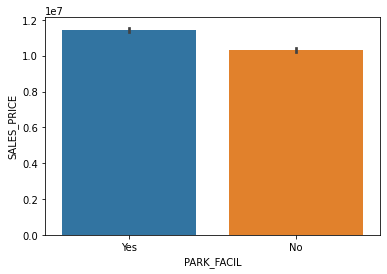

In [27]:
data["PARK_FACIL"].replace({"Noo":"No"},inplace=True)
sns.barplot(data.PARK_FACIL,data.SALES_PRICE)

**Observations:**
From the above plot House with Parking Facity have highest sales_price compared to house with no Parking Facility.

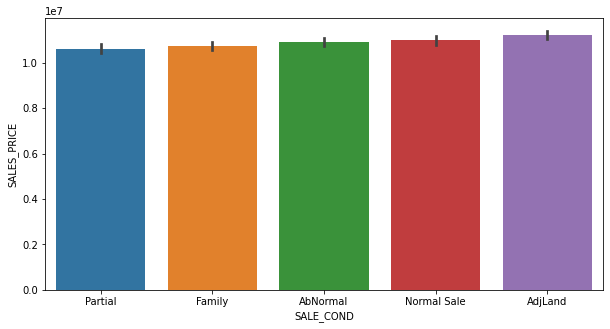

In [28]:
data["SALE_COND"].replace({"Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial","Adj Land":"AdjLand"},inplace=True)
plt.figure(figsize = (10,5))
sale = data.groupby(["SALE_COND"])["SALES_PRICE"].aggregate(np.mean).reset_index().sort_values("SALES_PRICE")
sns.barplot(x=data.SALE_COND,y=data.SALES_PRICE,data=data,order=sale["SALE_COND"])

**Observations:**
From the above plot There is a linear relationship e with the target label encoding can be done for SALE_COND

SALE_COND is not much affecting the Sales Price only slight variations with each type of SaleCondition, SALE_COND AdjLAnd have highest salesprice compared to others. AbNormal and Normale sale condition have almost equal Sales Price.


In [29]:
data["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

**Observations**:

Allpub and All Pub, NoSewr and NoSeWa are few mispelled UTILITY_AVAIL contents replace these with the correct spelled words.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


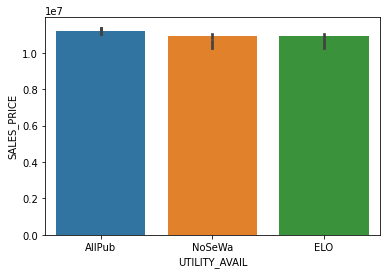

In [30]:
data["UTILITY_AVAIL"].replace({"All Pub":"AllPub","NoSewr ":"NoSeWa"},inplace = True)
sns.barplot(data.UTILITY_AVAIL,data.SALES_PRICE)
utility = data.groupby(["UTILITY_AVAIL"])["SALES_PRICE"].aggregate(np.median).reset_index().sort_values("SALES_PRICE",ascending=False)
sns.barplot(x=data.UTILITY_AVAIL,y=data.SALES_PRICE,data=data,order=utility["UTILITY_AVAIL"])

**Observations**:

AllPub have highest sales price where as NoSeWa and ELO have equal sales price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


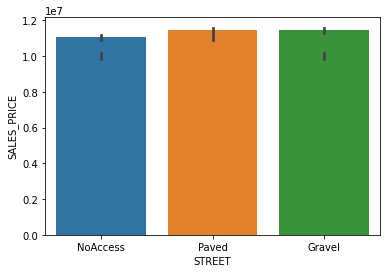

In [31]:
data["STREET"].replace({"Pavd":"Paved","No Access":"NoAccess"},inplace = True)
sns.barplot(data.STREET,data.SALES_PRICE)
utility = data.groupby(["STREET"])["SALES_PRICE"].aggregate(np.mean).reset_index().sort_values("SALES_PRICE",ascending=True)
sns.barplot(x=data.STREET,y=data.SALES_PRICE,data=data,order=utility["STREET"])

**Observation:**

Street with NoAccess have less sales price compared tothe Paved and Gravel.

street with paved and Gravel have equal sales price,there is no linearity so for UTILITY_AVAIL one hot encoding can be done

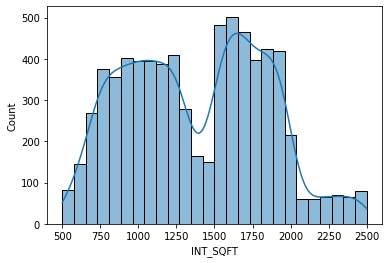

In [32]:
sns.histplot(data = data.INT_SQFT, kde = True)

**Encoding the categorical Variables**

**Observation**
AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE all are of type Object convert these to numerical type and there is a linear trend in each of these feature.

Using Lable encoding convert categorical to numerical  

In [33]:
#Label encoding using map function
Area_dict = {'Karapakkam':0,'Adyar':1,'Chromepet':2,'Velachery':3,'Anna Nagar':5,'KK Nagar':4,'T Nagar':6}
data["AREA"] = data["AREA"].map(Area_dict)

Sale_cond_dict = {"Partial":0,"Family":1,"AbNormal":2,"Normal Sale":3,"AdjLand":4}
data["SALE_COND"] = data["SALE_COND"].map(Sale_cond_dict)

Buildtype_cond_dict = {"House":0,"Other":1,"Commercial":2}
data["BUILDTYPE"] = data["BUILDTYPE"].map(Buildtype_cond_dict)

Mzzone_cond_dict = {"A":0,"C":1,"I":2,"RH":3,"RL":4,"RM":5}
data["MZZONE"] = data["MZZONE"].map(Mzzone_cond_dict)

Park_dict = {"No":0,"Yes":1}
data["PARK_FACIL"] = data["PARK_FACIL"].map(Park_dict)


In [34]:
#Oe hot encoding
dummy_UTILITY_AVAIL = pd.get_dummies(data["UTILITY_AVAIL"])
dummy_STREET = pd.get_dummies(data["STREET"])
#Merging these encode data into actuall DataFrame
data = pd.merge(left=data,right=dummy_UTILITY_AVAIL,left_index=True, right_index=True)
data = pd.merge(left=data,right=dummy_STREET,left_index=True, right_index=True)
data.drop(["UTILITY_AVAIL"],axis = 1,inplace = True)
data.drop(["STREET"],axis = 1,inplace = True)
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AllPub,ELO,NoSeWa,Gravel,NoAccess,Paved
0,0,1004,04-05-2011,131,1,1,3,2,1,15-05-1967,...,3.9,4.9,4.330,7600000,1,0,0,0,0,1
1,5,1986,19-12-2006,26,2,1,5,2,0,22-12-1995,...,4.2,2.5,3.765,21717770,1,0,0,1,0,0
2,1,909,04-02-2012,70,1,1,3,2,1,09-02-1992,...,3.8,2.2,3.090,13159200,0,1,0,1,0,0
3,3,1855,13-03-2010,14,3,2,5,1,0,18-03-1988,...,3.9,3.6,4.010,9630290,0,0,1,0,0,1
4,0,1226,05-10-2009,84,1,1,3,2,1,13-10-1979,...,2.5,4.1,3.290,7406250,1,0,0,1,0,0


DATE_SALE and DATE_BUILD datatype of these columns is 'Object' type Convert these columns to datatime datatype.

In [35]:
data["DATE_SALE"]=pd.to_datetime(data["DATE_SALE"],infer_datetime_format =True)
data["DATE_BUILD"]=pd.to_datetime(data["DATE_BUILD"],infer_datetime_format =True)

In [36]:
from datetime import timedelta
#df["diff_in_days"] / timedelta(days=365)
data["BUILD_AGE"] = (data["DATE_SALE"]-data["DATE_BUILD"])/ np.timedelta64(1,'Y')
type(data["BUILD_AGE"])

pandas.core.series.Series

In [37]:
data["BUILD_AGE"]

0       43.891387
1       10.992697
2       20.145520
3       21.985393
4       29.574871
          ...    
7104    49.123528
7105     9.317098
7106    27.981410
7107    31.573544
7108    43.970787
Name: BUILD_AGE, Length: 7109, dtype: float64

In [38]:
data.drop(["DATE_SALE"],axis = 1,inplace = True)
data.drop(["DATE_BUILD"],axis = 1,inplace = True)

In [39]:
#Rechecking for the datatypes of the data after convertion
data.dtypes

AREA               int64
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND          int64
PARK_FACIL         int64
BUILDTYPE          int64
MZZONE             int64
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
AllPub             uint8
ELO                uint8
NoSeWa             uint8
Gravel             uint8
NoAccess           uint8
Paved              uint8
BUILD_AGE        float64
dtype: object

In [40]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,MZZONE,...,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AllPub,ELO,NoSeWa,Gravel,NoAccess,Paved,BUILD_AGE
0,0,1004,131,1,1,3,2,1,2,0,...,4.9,4.330,7600000,1,0,0,0,0,1,43.891387
1,5,1986,26,2,1,5,2,0,2,3,...,2.5,3.765,21717770,1,0,0,1,0,0,10.992697
2,1,909,70,1,1,3,2,1,2,4,...,2.2,3.090,13159200,0,1,0,1,0,0,20.145520
3,3,1855,14,3,2,5,1,0,1,2,...,3.6,4.010,9630290,0,0,1,0,0,1,21.985393
4,0,1226,84,1,1,3,2,1,1,1,...,4.1,3.290,7406250,1,0,0,1,0,0,29.574871


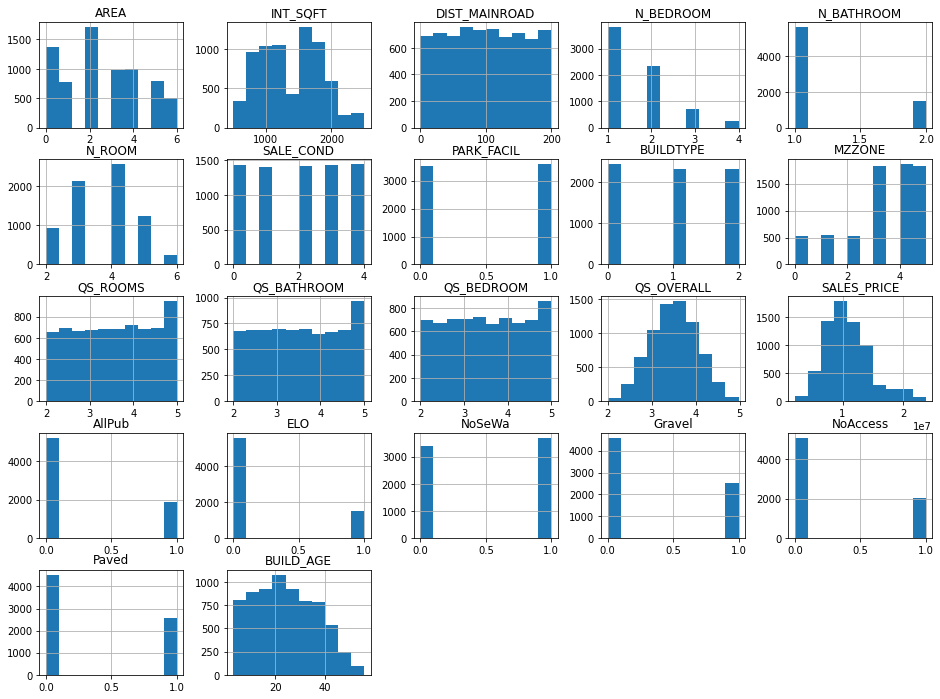

In [41]:
#Graphical repesentation of Distribution of each column of the data 
data.hist(bins=10,figsize=(16,12))
plt.show()

**Correlation Matrix with Heatmap**

We can check how each feature is related to others using corr() function.

In [42]:
data.corr()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,MZZONE,...,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AllPub,ELO,NoSeWa,Gravel,NoAccess,Paved,BUILD_AGE
AREA,1.000000,0.685243,0.003487,0.320889,-0.044401,0.644971,-0.001571,0.007916,0.014790,0.346385,...,0.004147,0.017745,0.694149,0.024412,-0.063226,0.030337,0.037557,-0.086284,0.043560,-0.072211
INT_SQFT,0.685243,1.000000,0.002022,0.786263,0.515290,0.951279,0.004029,0.004618,0.009084,0.143226,...,0.008865,0.013989,0.612125,0.027580,-0.089793,0.049350,0.045943,-0.113160,0.060426,-0.012815
DIST_MAINROAD,0.003487,0.002022,1.000000,-0.002723,0.001850,0.002301,-0.009342,-0.009448,0.023924,0.007334,...,0.001554,-0.017255,0.018783,-0.008859,0.012707,-0.002604,-0.005461,-0.009223,0.014090,-0.003717
N_BEDROOM,0.320889,0.786263,-0.002723,1.000000,0.755207,0.840209,0.006868,-0.009357,-0.003155,0.049928,...,0.015752,0.014245,0.330987,0.033766,-0.111240,0.061491,0.062603,-0.140196,0.069205,-0.045935
N_BATHROOM,-0.044401,0.515290,0.001850,0.755207,1.000000,0.568541,0.010695,-0.014033,-0.014043,-0.047164,...,0.013191,0.007961,0.108834,0.013895,-0.071477,0.046407,0.045213,-0.078364,0.028509,-0.020321
N_ROOM,0.644971,0.951279,0.002301,0.840209,0.568541,1.000000,0.000969,-0.000934,0.008122,0.163697,...,0.015072,0.015418,0.602760,0.023263,-0.083528,0.048021,0.049769,-0.105984,0.049886,-0.033529
SALE_COND,-0.001571,0.004029,-0.009342,0.006868,0.010695,0.000969,1.000000,0.003936,-0.002842,0.000122,...,0.003840,0.001542,0.054370,-0.006846,0.002936,0.003640,-0.005252,-0.001117,0.006276,0.011065
PARK_FACIL,0.007916,0.004618,-0.009448,-0.009357,-0.014033,-0.000934,0.003936,1.000000,0.012029,-0.007192,...,-0.001165,-0.009601,0.146428,-0.016010,0.026092,-0.007273,-0.005011,-0.003570,0.008339,-0.009206
BUILDTYPE,0.014790,0.009084,0.023924,-0.003155,-0.014043,0.008122,-0.002842,0.012029,1.000000,0.004869,...,0.003118,0.007476,0.515717,0.020036,-0.016065,-0.004518,-0.027006,-0.000522,0.027374,-0.012288
MZZONE,0.346385,0.143226,0.007334,0.049928,-0.047164,0.163697,0.000122,-0.007192,0.004869,1.000000,...,0.003635,-0.005553,0.427789,0.006626,-0.039813,0.026833,0.023995,-0.047071,0.020273,-0.111018


In [43]:
data.corr()["SALES_PRICE"].sort_values(ascending = False)

SALES_PRICE      1.000000
AREA             0.694149
INT_SQFT         0.612125
N_ROOM           0.602760
BUILDTYPE        0.515717
MZZONE           0.427789
N_BEDROOM        0.330987
PARK_FACIL       0.146428
N_BATHROOM       0.108834
Gravel           0.108100
SALE_COND        0.054370
AllPub           0.050266
Paved            0.032493
QS_ROOMS         0.021967
QS_OVERALL       0.020485
QS_BEDROOM       0.018804
DIST_MAINROAD    0.018783
NoSeWa           0.003960
QS_BATHROOM     -0.011377
ELO             -0.058934
BUILD_AGE       -0.119141
NoAccess        -0.149341
Name: SALES_PRICE, dtype: float64

Creating a pictorial visualisation of the above correlation matrix using a heatmap helps in better understanding. We can do that using Seaborn's Heatmap function.Creating a pictorial visualisation of the above correlation matrix using a heatmap helps in better understanding.

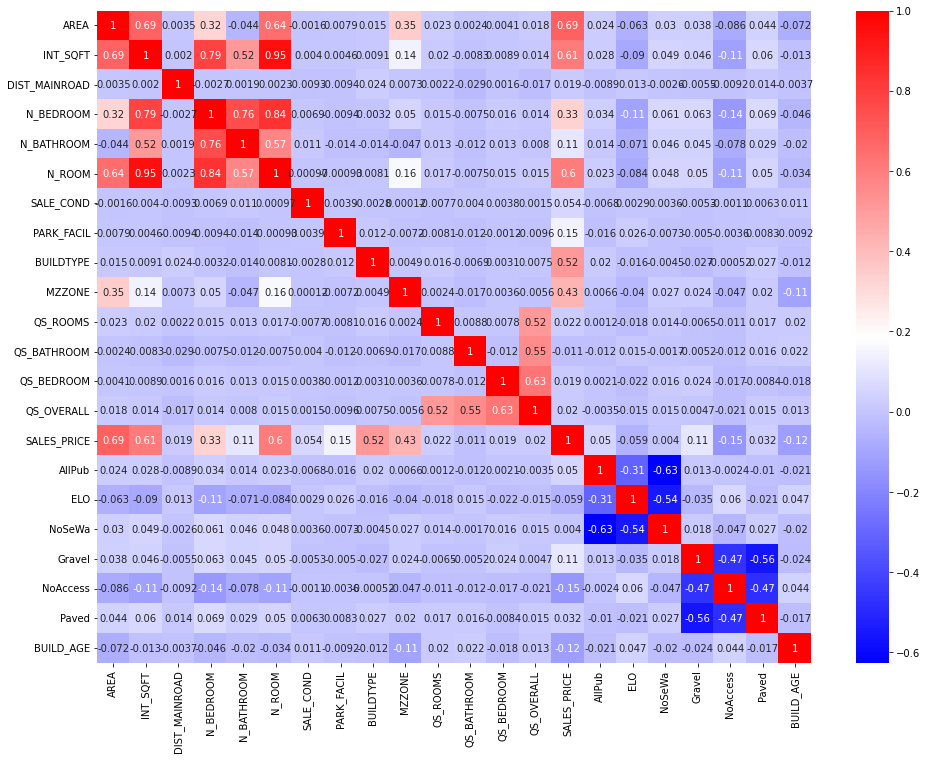

In [44]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),cmap='bwr',annot=True)

**Observation:**

There is a relatively high positive correlation between INT_SQFT,N_BEDROOM',N_BATHROOM,N_ROOM

There is a relatively high positive correlation between QS_ROOMS,QS_BATHROOM,QS_BEDROOM, 'QS_OVERALL

SALES_PRICE has highest positive correlation with MZZON,N_ROOM and INT_SQFT

SALES_PRICE has negetive correlation with BUILDTYPE


**MODELLING**

In [45]:
#Setting up the target and the dependent features 
X = data.drop(['SALES_PRICE'],axis=1)
y = data.SALES_PRICE

In [46]:
#creating dataset split for prediction 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size=0.3)

**Linear reggression**

In [47]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() #initialise my Linear Regression predictedScore = m * Hours + c
regressor.fit(X_train, y_train) 

LinearRegression()

In [48]:
y_pred = regressor.predict(X_test)

In [49]:
from sklearn import metrics 
#Import scikit-learn metrics module for accuracy calculation
#from sklearn.metrics import accuracy_score 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

linear_reg_R2_score = round(metrics.r2_score(y_test,y_pred)* 100,2)
print(linear_reg_R2_score)

Mean Absolute Error: 1020640.4280233289
Mean Squared Error: 1631757201472.265
87.93


**DECISION TREE REGGRESSOR**

In [50]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [59]:
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = regressor.predict(X_test)
# print the predicted price
data2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
decision_tree_R2_score = round(metrics.r2_score(y_test,y_pred)*100,2)
print(decision_tree_R2_score)

Mean Absolute Error: 555805.0703234881
Mean Squared Error: 516841122995.08905
96.18


In [53]:
import xgboost as xg
# Instantiation
xgb_r = xg.XGBRegressor()
# Fitting the model
xgb_r.fit(X_train, y_train)
# Predict the model
y_pred = xgb_r.predict(X_test)

from sklearn.metrics import mean_squared_error as MSE
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))
XGB_Reggressor_R2_score = round(metrics.r2_score(y_test,y_pred)*100,2)
print(XGB_Reggressor_R2_score)

[17:08:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  335846.141229
99.17


In [54]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
# Check R2 score 
random_forest_Reggressor_R2_score = round(metrics.r2_score(y_test,y_pred)*100,2)
print(random_forest_Reggressor_R2_score)

98.43


In [55]:
# Fitting Gradient Boosting Regression to the dataset
# import the regressor
from sklearn.ensemble import GradientBoostingRegressor
grad_reggressor = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=0)
grad_reggressor.fit(X_train, y_train) 

y_pred = grad_reggressor.predict(X_test)
# Check accuracy score 
GradientB_Reggressor_R2_score = round(metrics.r2_score(y_test,y_pred)*100,2)
print(GradientB_Reggressor_R2_score)

99.19


**Visualizing all the models R2_score**

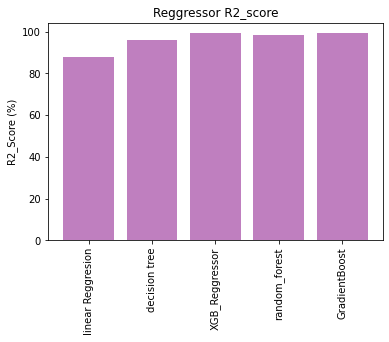

In [56]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('linear Reggresion', 'decision tree', 'XGB_Reggressor','random_forest','GradientBoost')
x_pos = np.arange(len(predictors_group))
accuracies1 = [linear_reg_R2_score, decision_tree_R2_score, XGB_Reggressor_R2_score,random_forest_Reggressor_R2_score,GradientB_Reggressor_R2_score]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='purple')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('R2_Score (%)')
plt.title('Reggressor R2_score')
plt.show()

**Observation:**

XGB_reggressor and Gradient boosting reggressor are giving almost equal R2 score just varies in points


In [60]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
# creating list of tuple wth model and its name  
models = []
models.append(('LR',LinearRegression()))
models.append(('DT',DecisionTreeRegressor()))
models.append(('XGB',XGBRegressor()))
models.append(('RF',RandomForestRegressor()))
models.append(('GDB',GradientBoostingRegressor()))

# Import Cross Validation 
from sklearn.model_selection import cross_val_score

# simulate splitting a dataset of 1000 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X)
# print(kf)

acc = []   # All Algorithm/model accuracies
names = []    # All model name

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2') # kFolds =5 without shuffling
    
    acc.append(acc_of_model) # appending Accuray of different model to acc List
    
    names.append(name)# appending name of models
    Acc =name,round(acc_of_model.mean()*100,2) # printing Output 
    print(Acc)

('LR', 88.22)
('DT', 95.94)
[17:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
('XGB', 99.05)
('RF', 98.25)
('GDB', 99.09)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


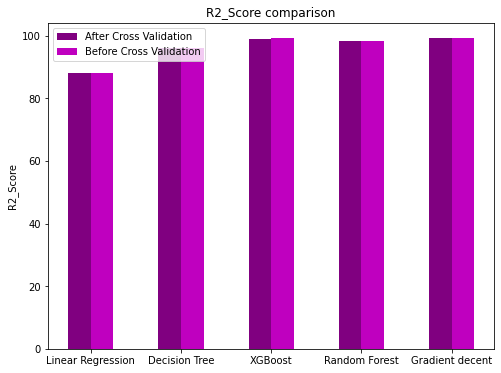

In [61]:
# Plotting all accuracies together for comparison

labels = ['Linear Regression','Decision Tree','XGBoost','Random Forest','Gradient decent']

NoCV =[87.93,96.18,99.17,98.43,99.19] # accuracy before Cross Validation
CV=[88.22,95.94,99.05,98.25,99.09] # accuracy after Cross Validation

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

f, ax = plt.subplots(figsize=(8,6)) 
p1 = ax.bar(x - width/2, CV, width, label='After Cross Validation', color='purple')
p2 = ax.bar(x + width/2, NoCV, width, label='Before Cross Validation', color='m')

# Add some text for labels and title 
ax.set_ylabel('R2_Score')
ax.set_title('R2_Score comparison')
ax.set_xticks(x)
plt.xticks()
ax.set_xticklabels(labels)
ax.legend(loc='top right')
plt.show()

**Observations**

There are not much variation in the results of models befor cross validation and after cross validation.

The best models for the sales price prediction is XGBoost and the GradentBoosting models